In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
input_file = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/RecipeDB_combined.csv')
cf_sm = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/RecipeCF/RecipeDB_CF_with_string_matching.csv', encoding='latin1')


In [3]:
recipe = input_file[['ID', 'title', 'ingredients']]
recipe

,ID,title,ingredients
0,2610,Egyptian Lentil Soup,"['black pepper', 'cumin', 'garlic', 'sea salt'..."
1,2611,Egyptian Green Beans with Carrots,"['green bean carrot', 'vegetable oil', 'bay le..."
2,2612,Egyptian Bamia,"['okra', 'salt black pepper', 'lamb shoulder',..."
3,2613,Magpie's Easy Falafel Cakes,"['cornmeal', 'cumin', 'sauce', 'garlic', 'cori..."
4,2614,Dukkah,"['black pepper', 'sea salt', 'cumin seed', 'co..."
...,...,...,...
118078,149187,Jerusalem Artichoke Stir Fry,"['yellow pepper', 'mushroom', 'garlic', 'jalap..."
118079,149188,Asian Apple Pear Compote,"['cardamom seed', 'asian pear', 'water', 'ging..."
118080,149189,Skillet Sweet Potatoes,"['potato', 'pepper', 'vegetable stock', 'salt'..."
118081,149190,Any-Flavour Cookies,"['baking powder', 'vanilla', 'flour', 'sugar',..."


In [4]:
import ast
import operator
count = {}

recipes = recipe["ID"].nunique()

for i in range(recipes):
    r = recipe['ingredients'][i]
    res = ast.literal_eval(r)
    for k in res:
        count[k] = count.get(k,0) + 1
sorted_d = dict(sorted(count.items(), key=operator.itemgetter(1),reverse=True))

In [5]:
import ast
import operator
count = {}

recipes = recipe["ID"].nunique()

for i in range(recipes):
    ava = cf_sm['Available Ingredients'][i]
    res = ast.literal_eval(ava)
    for k in res:
        count[k] = count.get(k,0) + 1
ava_sorted_d = dict(sorted(count.items(), key=operator.itemgetter(1),reverse=True))

In [6]:
exact_match = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/RecipeCF/RecipeDB_CF_without_string_matching.csv', encoding='latin1')
subs_match = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/RecipeCF/RecipeDB_CF_with_string_matching.csv', encoding='latin1')

Exact Match

In [7]:
exa_count={}

recipes = exact_match["Recipe ID"].nunique()

for i in range(recipes):
    exa_ava = exact_match['Available Ingredients'][i]
    res = ast.literal_eval(exa_ava)
    for k in res:
        exa_count[k] = exa_count.get(k,0) + 1
exa_ava_sorted_d = dict(sorted(exa_count.items(), key=operator.itemgetter(1),reverse=True))

In [8]:
top_exa_ingredients = list(exa_ava_sorted_d.keys())
top_ingredients = list(sorted_d.keys())

all_subset_sizes = list(range(100, 20001, 100))  # Generate list from 100 to 20000 with a step of 100
exa_counts_of_common_ingredients = []

for size in all_subset_sizes:
    exa_common_ingredients = set(top_exa_ingredients[:size]).intersection(top_ingredients[:size])
    exa_counts_of_common_ingredients.append(len(exa_common_ingredients))

for size, count in zip(all_subset_sizes, exa_counts_of_common_ingredients):
    print("Count of Top", size, "Common Ingredients:", count)


Count of Top 100 Common Ingredients: 28
Count of Top 200 Common Ingredients: 51
Count of Top 300 Common Ingredients: 63
Count of Top 400 Common Ingredients: 78
Count of Top 500 Common Ingredients: 85
Count of Top 600 Common Ingredients: 89
Count of Top 700 Common Ingredients: 94
Count of Top 800 Common Ingredients: 99
Count of Top 900 Common Ingredients: 103
Count of Top 1000 Common Ingredients: 104
Count of Top 1100 Common Ingredients: 111
Count of Top 1200 Common Ingredients: 112
Count of Top 1300 Common Ingredients: 117
Count of Top 1400 Common Ingredients: 119
Count of Top 1500 Common Ingredients: 124
Count of Top 1600 Common Ingredients: 125
Count of Top 1700 Common Ingredients: 128
Count of Top 1800 Common Ingredients: 130
Count of Top 1900 Common Ingredients: 133
Count of Top 2000 Common Ingredients: 137
Count of Top 2100 Common Ingredients: 139
Count of Top 2200 Common Ingredients: 140
Count of Top 2300 Common Ingredients: 140
Count of Top 2400 Common Ingredients: 141
Count of 

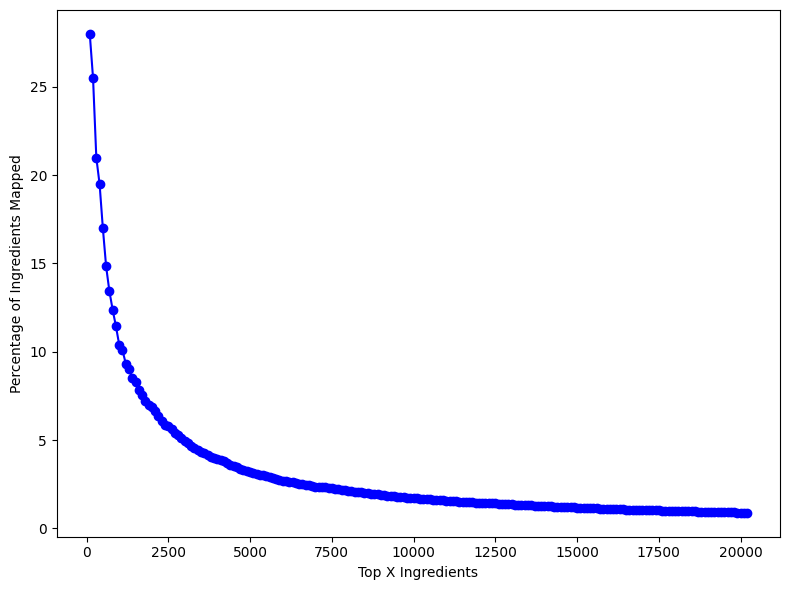

In [9]:
import matplotlib.pyplot as plt

top_exa_ingredients = list(exa_ava_sorted_d.keys())
top_ingredients = list(sorted_d.keys())

all_subset_sizes = list(range(100, 20280, 100))  # Generate list from 100 to 20000 with a step of 100
exa_counts_of_common_ingredients = []

for size in all_subset_sizes:
    exa_common_ingredients = set(top_exa_ingredients[:size]).intersection(top_ingredients[:size])
    exa_counts_of_common_ingredients.append(len(exa_common_ingredients))

# Calculate the percentage of ingredients mapped for each top x size
exa_percent_ingredients_mapped = [(count / size) * 100 for count, size in zip(exa_counts_of_common_ingredients, all_subset_sizes)]

# Plot the percentage of ingredients mapped
plt.figure(figsize=(8, 6))
plt.plot(all_subset_sizes, exa_percent_ingredients_mapped, marker='o', color='blue')
plt.xlabel('Top X Ingredients')
plt.ylabel('Percentage of Ingredients Mapped')
plt.tight_layout()

plt.show()


BERT Mapping

In [10]:
top_ava_ingredients = list(ava_sorted_d.keys())
top_ingredients = list(sorted_d.keys())

all_subset_sizes = list(range(100, 20280, 100))  # Generate list from 100 to 20000 with a step of 100
counts_of_common_ingredients = []

for size in all_subset_sizes:
    common_ingredients = set(top_ava_ingredients[:size]).intersection(top_ingredients[:size])
    counts_of_common_ingredients.append(len(common_ingredients))

for size, count in zip(all_subset_sizes, counts_of_common_ingredients):
    print("Count of Top", size, "Common Ingredients:", count)


Count of Top 100 Common Ingredients: 71
Count of Top 200 Common Ingredients: 135
Count of Top 300 Common Ingredients: 185
Count of Top 400 Common Ingredients: 250
Count of Top 500 Common Ingredients: 302
Count of Top 600 Common Ingredients: 354
Count of Top 700 Common Ingredients: 401
Count of Top 800 Common Ingredients: 451
Count of Top 900 Common Ingredients: 496
Count of Top 1000 Common Ingredients: 543
Count of Top 1100 Common Ingredients: 595
Count of Top 1200 Common Ingredients: 633
Count of Top 1300 Common Ingredients: 689
Count of Top 1400 Common Ingredients: 729
Count of Top 1500 Common Ingredients: 783
Count of Top 1600 Common Ingredients: 834
Count of Top 1700 Common Ingredients: 881
Count of Top 1800 Common Ingredients: 935
Count of Top 1900 Common Ingredients: 989
Count of Top 2000 Common Ingredients: 1040
Count of Top 2100 Common Ingredients: 1087
Count of Top 2200 Common Ingredients: 1136
Count of Top 2300 Common Ingredients: 1183
Count of Top 2400 Common Ingredients: 12

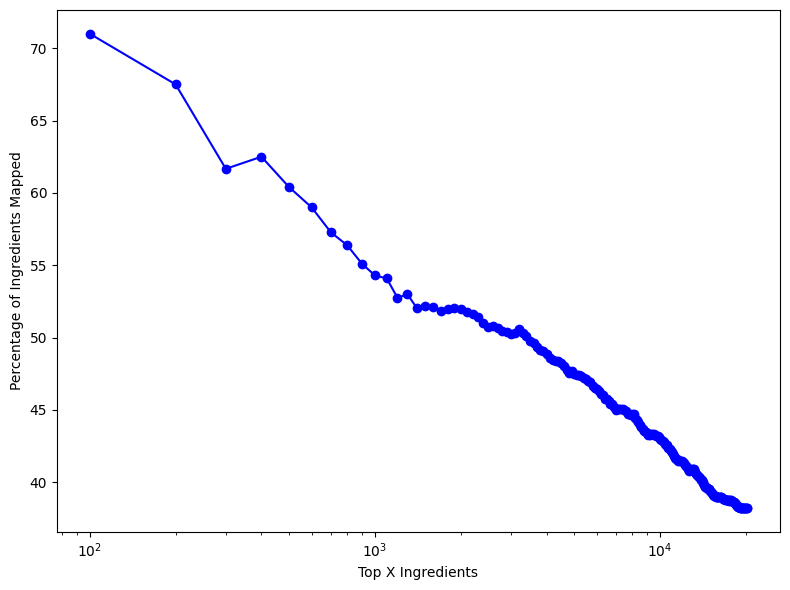

In [11]:
top_ava_ingredients = list(ava_sorted_d.keys())
top_ingredients = list(sorted_d.keys())

all_subset_sizes = list(range(100, 20280, 100))  # Generate list from 100 to 20000 with a step of 100
counts_of_common_ingredients = []

for size in all_subset_sizes:
    common_ingredients = set(top_ava_ingredients[:size]).intersection(top_ingredients[:size])
    counts_of_common_ingredients.append(len(common_ingredients))

# Calculate the percentage of ingredients mapped for each top x size
percent_ingredients_mapped = [(count / size) * 100 for count, size in zip(counts_of_common_ingredients, all_subset_sizes)]

# Plot the percentage of ingredients mapped
plt.figure(figsize=(8, 6))
plt.plot(all_subset_sizes, percent_ingredients_mapped, marker='o', color='blue')
plt.xlabel('Top X Ingredients')
plt.xscale('log')
plt.ylabel('Percentage of Ingredients Mapped')
plt.tight_layout()

plt.show()


RoBERTa Mapping

In [12]:
robe = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/Mapped/roberta_nli_recipedb_sueat_map.csv')

In [13]:
df_robe = robe[(robe['Similarity'] > 0.81)]
df_robe

,Unnamed: 0,RecipeDB_Ingredient,Sueatable_Ingredient,Similarity
0,0,salt,SOLE,0.843593
1,1,onion,ONION,1.000000
2,2,butter,BUTTER,1.000000
3,3,garlic clove,GARLIC,0.822195
4,4,water,WATER,1.000000
...,...,...,...,...
20271,20271,orange jelly crystal,ORANGE JUICE,0.846103
20274,20274,dutch cocoa hershey,CHOCOLATE CREAM COOKY,0.840384
20275,20275,milk chocolate hershey,MILK CHOCOLATE,0.953825
20276,20276,chocolate flavor crisp rice cereal,CHOCOLATE CREAM COOKY,0.854235


In [14]:
rob_ingredients = list(df_robe['RecipeDB_Ingredient'])
top_ingredients = list(sorted_d.keys())

all_subset_sizes = list(range(100, 20280, 100))  # Generate list from 100 to 20000 with a step of 100
rob_common_ingredients = []

for size in all_subset_sizes:
    common_ingredients = set(rob_ingredients[:size]).intersection(top_ingredients[:size])
    rob_common_ingredients.append(len(common_ingredients))

for size, count in zip(all_subset_sizes, rob_common_ingredients):
    print("Count of Top", size, "Common Ingredients:", count)


Count of Top 100 Common Ingredients: 74
Count of Top 200 Common Ingredients: 140
Count of Top 300 Common Ingredients: 191
Count of Top 400 Common Ingredients: 246
Count of Top 500 Common Ingredients: 291
Count of Top 600 Common Ingredients: 331
Count of Top 700 Common Ingredients: 375
Count of Top 800 Common Ingredients: 424
Count of Top 900 Common Ingredients: 471
Count of Top 1000 Common Ingredients: 517
Count of Top 1100 Common Ingredients: 565
Count of Top 1200 Common Ingredients: 603
Count of Top 1300 Common Ingredients: 649
Count of Top 1400 Common Ingredients: 693
Count of Top 1500 Common Ingredients: 748
Count of Top 1600 Common Ingredients: 797
Count of Top 1700 Common Ingredients: 847
Count of Top 1800 Common Ingredients: 892
Count of Top 1900 Common Ingredients: 946
Count of Top 2000 Common Ingredients: 986
Count of Top 2100 Common Ingredients: 1031
Count of Top 2200 Common Ingredients: 1074
Count of Top 2300 Common Ingredients: 1119
Count of Top 2400 Common Ingredients: 115

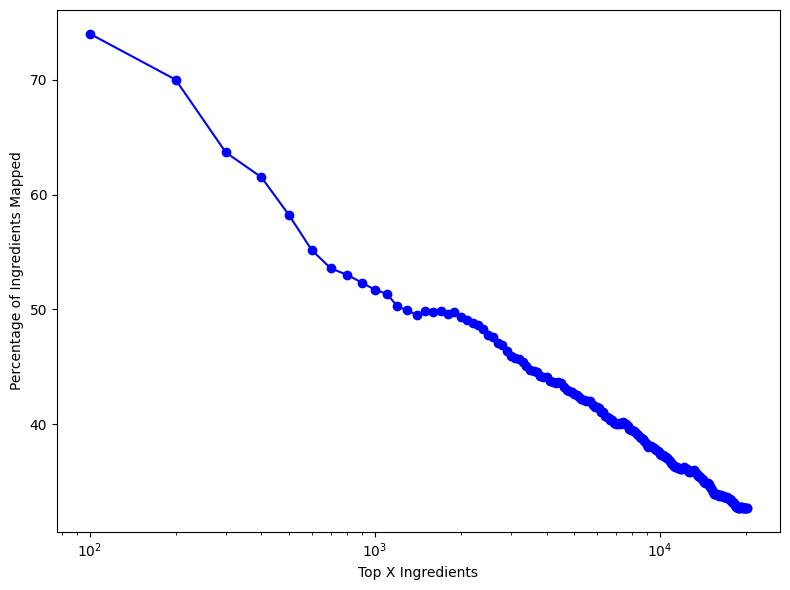

In [15]:
rob_ingredients = list(df_robe['RecipeDB_Ingredient'])
top_ingredients = list(sorted_d.keys())

all_subset_sizes = list(range(100, 20280, 100))  # Generate list from 100 to 20000 with a step of 100
rob_common_ingredients = []

for size in all_subset_sizes:
    common_ingredients = set(rob_ingredients[:size]).intersection(top_ingredients[:size])
    rob_common_ingredients.append(len(common_ingredients))

# Calculate the percentage of ingredients mapped for each top x size
rob_percent_ingredients_mapped = [(count / size) * 100 for count, size in zip(rob_common_ingredients, all_subset_sizes)]

# Plot the percentage of ingredients mapped
plt.figure(figsize=(8, 6))
plt.plot(all_subset_sizes, rob_percent_ingredients_mapped, marker='o', color='blue')
plt.xlabel('Top X Ingredients')
plt.xscale('log')
plt.ylabel('Percentage of Ingredients Mapped')
plt.tight_layout()

plt.show()


Word2Vec

In [16]:
w2v = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/Mapped/word2vec_recipedb_sueat_map.csv')

In [17]:
df_w2v = w2v[(w2v['Similarity'] > 0.999)]
df_w2v

,Unnamed: 0,RecipeDB_Ingredient,Sueatable_Ingredient,Similarity
1,1,onion,onion,1.000000
2,2,butter,butter,1.000000
3,3,garlic clove,garlic,0.999593
4,4,water,water,1.000000
5,5,olive oil,olive oil,1.000000
...,...,...,...,...
20272,20272,frisee lettuce,lettuce,0.999041
20275,20275,milk chocolate hershey,milk chocolate,0.999918
20276,20276,chocolate flavor crisp rice cereal,chocolate cream cooky,0.999646
20277,20277,chocolate ripple ice cream,chocolate cream cooky,0.999836


In [18]:
df_w2v.to_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Data/Mapped/word2vec_recipedb_sueat_map_cutoff.csv', index=False)

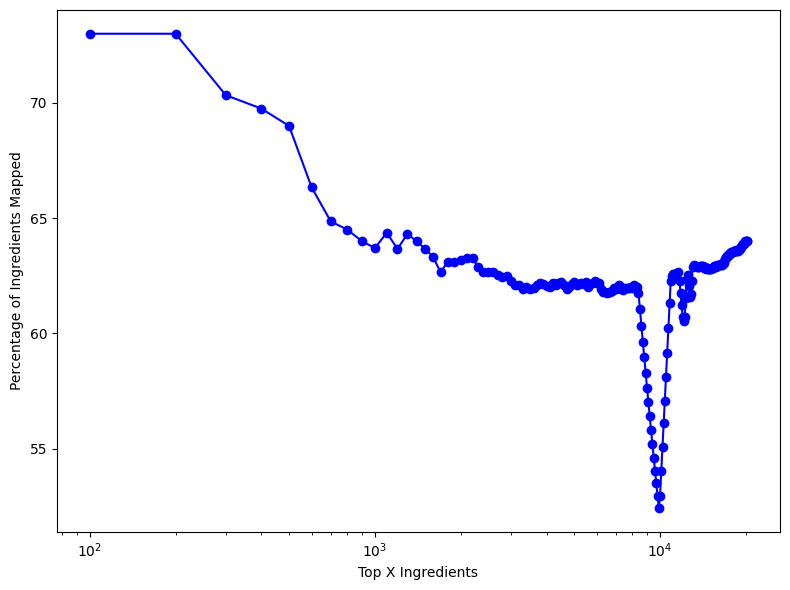

In [19]:
w2v_ingredients = list(df_w2v['RecipeDB_Ingredient'])
top_ingredients = list(sorted_d.keys())

all_subset_sizes = list(range(100, 20280, 100))  # Generate list from 100 to 20000 with a step of 100
w2v_common_ingredients = []

for size in all_subset_sizes:
    common_ingredients = set(w2v_ingredients[:size]).intersection(top_ingredients[:size])
    w2v_common_ingredients.append(len(common_ingredients))

# Calculate the percentage of ingredients mapped for each top x size
w2v_percent_ingredients_mapped = [(count / size) * 100 for count, size in zip(w2v_common_ingredients, all_subset_sizes)]

# Plot the percentage of ingredients mapped
plt.figure(figsize=(8, 6))
plt.plot(all_subset_sizes, w2v_percent_ingredients_mapped, marker='o', color='blue')
plt.xlabel('Top X Ingredients')
plt.xscale('log')
plt.ylabel('Percentage of Ingredients Mapped')
plt.tight_layout()

plt.show()


# Comparison of models

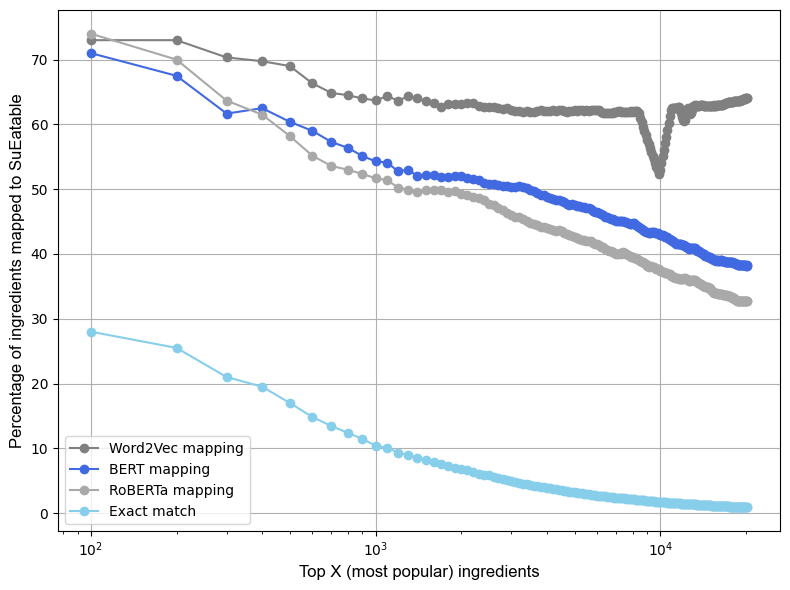

In [20]:
plt.figure(figsize=(8, 6))

plt.plot(all_subset_sizes, w2v_percent_ingredients_mapped, marker='o', color = 'grey', label = 'Word2Vec mapping')
plt.plot(all_subset_sizes, percent_ingredients_mapped, marker='o', color = 'royalblue', label = 'BERT mapping')
plt.plot(all_subset_sizes, rob_percent_ingredients_mapped, marker='o', color = 'darkgrey', label = 'RoBERTa mapping')
plt.plot(all_subset_sizes, exa_percent_ingredients_mapped, marker='o', color = 'skyblue', label = 'Exact match')

plt.xlabel('Top X (most popular) ingredients', fontsize=12, fontname="Arial")
plt.ylabel('Percentage of ingredients mapped to SuEatable', fontsize=12, fontname="Arial")

plt.xscale('log')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend()
plt.grid('True')
plt.tight_layout()

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Ingredient_analysis/TopX_ing_mapped_percentage_comparison.jpeg", bbox_inches= 'tight', dpi=300)

plt.show()